# Function Approximation using Neural Networks

In [1]:
import torch
import torch.nn as nn

torch.manual_seed(42)

In [2]:
# create data
x = torch.unsqueeze(torch.linspace(-2, 2, 1000), dim=1)
y = x.pow(2)

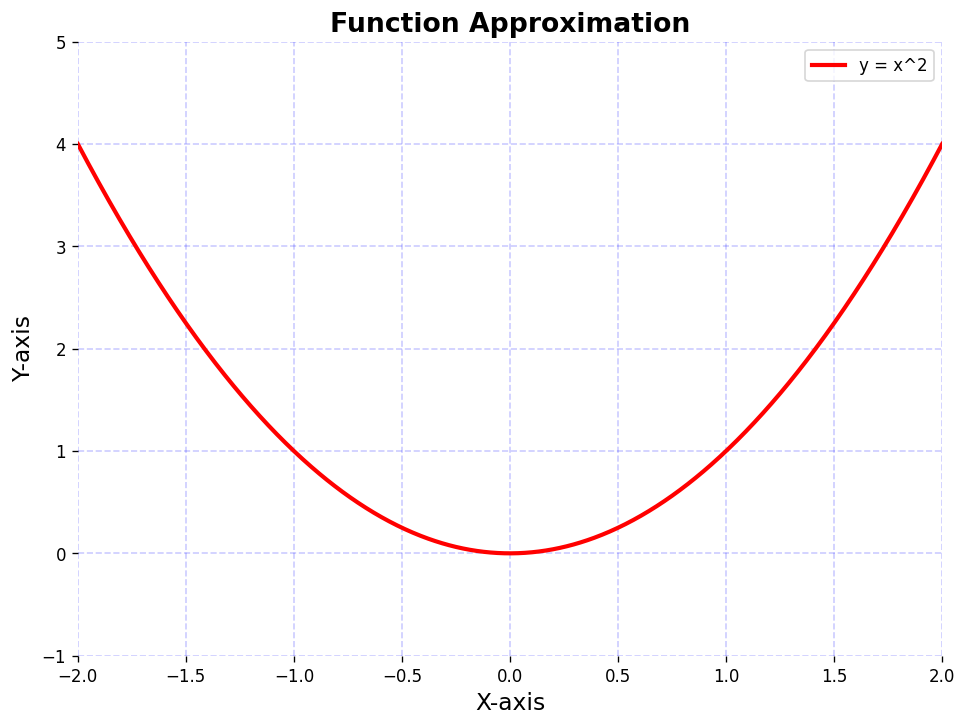

In [3]:
from implicitnet.plotting import plot_function

plot_function(x, y)

In [4]:
# linear model with one hidden layer
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [5]:
# train the model
linear_model = LinearModel(input_dim=1, hidden_dim=20, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.01)

losses, preds = [], []
training_epochs = 100
for epoch in range(training_epochs + 1):
    outputs = linear_model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    preds.append(linear_model(x).detach().numpy())

# model predictions
final_pred = linear_model(x).detach().numpy()

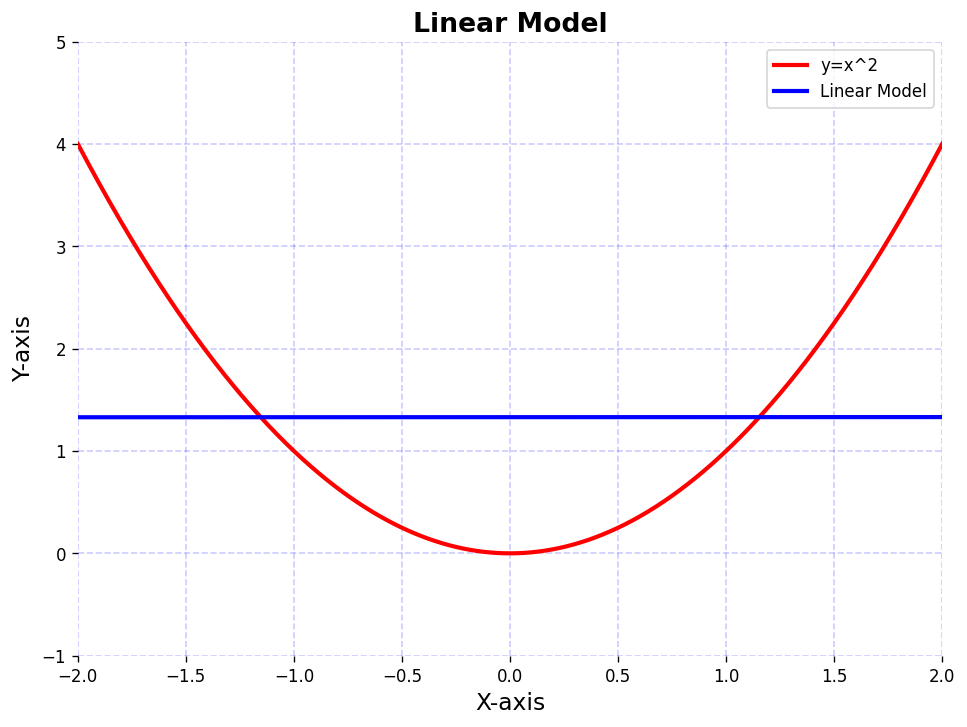

In [6]:
from implicitnet.plotting import plot_model

plot_model(x=x, y=y, predicted=final_pred)

In [7]:
from implicitnet.plotting import plot_animation

predictions = {}
n_iters = list(range(0, 101))
for epoch in n_iters:
    predictions[epoch] = preds[epoch]

plot_animation(
    x=x,
    y=y,
    preds=predictions,
    file_name="linear",
    folder_name="linear_plots",
)

In [9]:
import os
import imageio

# get paths and create directories
path = os.path.abspath(os.path.join(os.getcwd(), ".."))
plots_dir = os.path.join(path, "plots", "linear_plots")
animation_dir = os.path.join(path, "animations")
if not os.path.exists(animation_dir):
    os.makedirs(animation_dir)

# create animation
frames = []
for epoch in n_iters:
    image = imageio.v2.imread(f"{plots_dir}/linear_{epoch}.png")
    frames.append(image)

imageio.mimsave(
    f"{animation_dir}/linear_animation.gif",  # output gif
    frames,  # array of input frames
    duration=64,  # optional: frames per second
    loop=0,  # loop the gif
)